# Import Package/Library

In [1]:
# Import package/library
import re
import string
from collections import defaultdict
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
import pickle

pd.set_option("display.max_colwidth", 1000)
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fariz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Create Stopwords for Bahasa Indonesia
nltk.download("stopwords")
id_stop = set(stopwords.words("indonesian"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fariz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load Data

In [3]:
# Turn data into dataframe
df = pd.read_csv("C:\\Users\\fariz\\Downloads\\bot\\NLP_App\\review_hotel.csv")
df.head(5)

,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pelayannya ramah dan banyak membantu. Lokasi cukup dekat ke beberapa obyek wisata. kalau saya ke bandung lagi mungkin saya akan menginap lagi di sini.",1
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater untuk kopi/teh atau dispenser dan tidak tersedia kursi di depan kamar untuk merokok hingga harus duduk di lantai",0
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh jdi sarang nyamuk dikamar mandinya...pesan superior double yg dikasih twin...mungkin karena murah saya maklumin, tpi kedepan mohon untuk bisa jdi perbaikan untuk bisa lbh baik lg..",0
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk tidak diganti,",0
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0


In [4]:
df['category_new'] = df['category'].replace(0,'Negatif', regex=True).replace(1,'Positif', regex=True)
df

,review_id,review_text,category,category_new
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pelayannya ramah dan banyak membantu. Lokasi cukup dekat ke beberapa obyek wisata. kalau saya ke bandung lagi mungkin saya akan menginap lagi di sini.",1,Positif
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater untuk kopi/teh atau dispenser dan tidak tersedia kursi di depan kamar untuk merokok hingga harus duduk di lantai",0,Negatif
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh jdi sarang nyamuk dikamar mandinya...pesan superior double yg dikasih twin...mungkin karena murah saya maklumin, tpi kedepan mohon untuk bisa jdi perbaikan untuk bisa lbh baik lg..",0,Negatif
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk tidak diganti,",0,Negatif
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0,Negatif
...,...,...,...,...
14851,5ed96732e4f1e1e69dfb8669cf507587,kotor dan tidak ada wifi,0,Negatif
14852,b0692bdf4926ee0d58c2d9a0f28b0d62,Kamar tidak bersih,0,Negatif
14853,5217f5f284066f232d7b3c3bbd3cccd2,kamarnya terlalu kecil beberapa cm antara kasur dan dinding\n,0,Negatif
14854,31ca5a04ccc0dae4eaafc91c9822bede,Wifinya sangat kurang memadai..,0,Negatif


In [5]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14856 entries, 0 to 14855
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     14856 non-null  object
 1   review_text   14856 non-null  object
 2   category      14856 non-null  int64 
 3   category_new  14856 non-null  object
dtypes: int64(1), object(3)
memory usage: 464.4+ KB


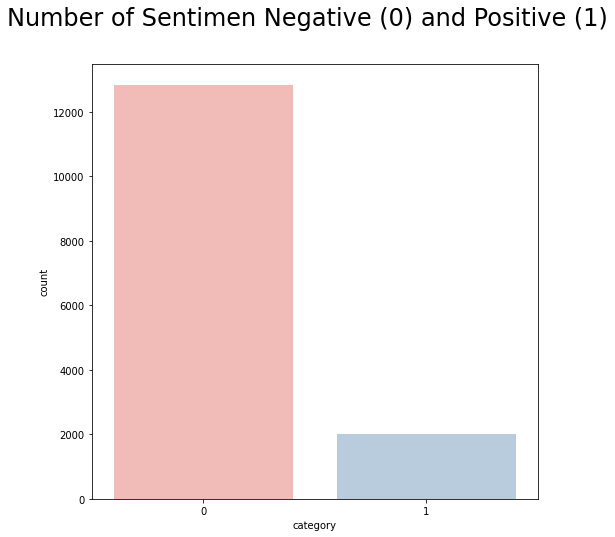

In [6]:
# Check number of values of feature 'category'
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='category', palette='Pastel1')
plt.suptitle("Number of Sentimen Negative (0) and Positive (1)", fontsize=24)
plt.show()

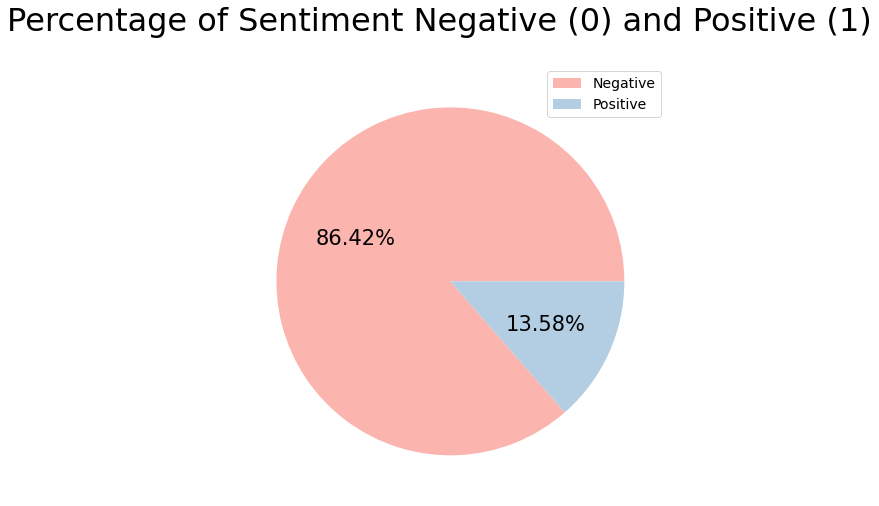

In [7]:
# Check percentage of values of feature 'category'
def pie_chart(dataset,column,textsize,title,title_size,figsize1,figsize2,label,color):
  plt.figure(figsize=(figsize1,figsize2))
  plt.pie(dataset[column].value_counts(),
          colors=sns.color_palette(color),
          textprops={"fontsize":textsize},
          autopct='%0.2f%%'
          )
  plt.suptitle(title, fontsize=title_size)
  plt.legend(label, fontsize=14)
  plt.show()


label = ["Negative","Positive"]
title = "Percentage of Sentiment Negative (0) and Positive (1)"
pie_chart(df,'category',21,title,32,12,8,label,'Pastel1')

# Preprocessing Data

In [8]:
# Preprocess data
punctuations = string.punctuation

# Remove punctuation and turn into space
def punct2wspace(text):
    return re.sub(r"[{}]+".format(punctuations), " ", text)

# Remove enter and turn into space
def normalize_enter(text):
    return re.sub(r"\n+", " ", text)

# Turn double spaces into single space
def normalize_wspace(text):
    return re.sub(r"\s+", " ", text)

# Lowercase the letter
def casefolding(text):
    return text.lower()

# Combine all preprocessing
def preprocess_text(text):
    text = punct2wspace(text)
    text = normalize_enter(text)
    text = normalize_wspace(text)
    text = casefolding(text)
    return text

sample_text = preprocess_text("hunter934official@gmail.com\n")
sample_text

'hunter934official gmail com '

In [9]:
# Apply preprocessing and join the preprocessed text into the dataframe
df["preprocessed_text"] = df["review_text"].map(preprocess_text)
df.head(5)

,review_id,review_text,category,category_new,preprocessed_text
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pelayannya ramah dan banyak membantu. Lokasi cukup dekat ke beberapa obyek wisata. kalau saya ke bandung lagi mungkin saya akan menginap lagi di sini.",1,Positif,penginapannya rapi bersih suasana tenang pelayannya ramah dan banyak membantu lokasi cukup dekat ke beberapa obyek wisata kalau saya ke bandung lagi mungkin saya akan menginap lagi di sini
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater untuk kopi/teh atau dispenser dan tidak tersedia kursi di depan kamar untuk merokok hingga harus duduk di lantai",0,Negatif,wifi tidak sampai kamar tidak tersedia heater untuk kopi teh atau dispenser dan tidak tersedia kursi di depan kamar untuk merokok hingga harus duduk di lantai
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh jdi sarang nyamuk dikamar mandinya...pesan superior double yg dikasih twin...mungkin karena murah saya maklumin, tpi kedepan mohon untuk bisa jdi perbaikan untuk bisa lbh baik lg..",0,Negatif,lantai kamar mandi kotor bau dan seperti sdh jdi sarang nyamuk dikamar mandinya pesan superior double yg dikasih twin mungkin karena murah saya maklumin tpi kedepan mohon untuk bisa jdi perbaikan untuk bisa lbh baik lg
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk tidak diganti,",0,Negatif,wc jorok kasur tidak dibersihkan handuk tidak diganti
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0,Negatif,bocor lagi


In [10]:
# Split a sentence into single word

words = df['preprocessed_text']
allwords = []
for wordlist in words.values:
  if wordlist not in id_stop:
    wordlist = wordlist.split()
    allwords += wordlist

allwords = pd.DataFrame(allwords)
allwords.head()
len(allwords)

247410

In [11]:
# Filter the words with Stopwords (Bahasa Indonesia)

allwords_stopword = []
for wordlist in allwords[0].values: 
  if wordlist not in id_stop:
    allwords_stopword.append(wordlist)

len(allwords_stopword)

169597

# EDA

In [12]:
# Check the polarity of the review, then create 'polarity' column and add it into the dataframe

df['polarity'] = df['preprocessed_text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [13]:
# Print 3 random reviews with the highest polarity 

print("3 Random Reviews with Highest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['review_text']):
  print(f"Review {index+1}: %s \n" % review)

3 Random Reviews with Highest Polarity:
Review 1: For budget business travel this hotel is perfect for 2-3 days stay 

Review 2: Superb, mantap, istimewa, nyaman bersih dapat sarapan pagi, terdapat mushola yang baik. 

Review 3: Pokok e the best lah.... Pelayanannya keren.... Recommended banget 



In [14]:
# Print 3 random reviews with the lowest polarity 

print("3 Random Reviews with Lowest Polarity:")
for index,review in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['review_text']):
  print('Review {}:\n'.format(index+1),review)

3 Random Reviews with Lowest Polarity:
Review 1:
 Worst airy rooms ever
Review 2:
 pelayanan buruk, pelayan tidak ramah, handuk cuma disediakan satu, handuk kering sekali jadi kasar dikulit, ac tidak dingin.. worst cottage ever!!!
Review 3:
 Worst hotel ever


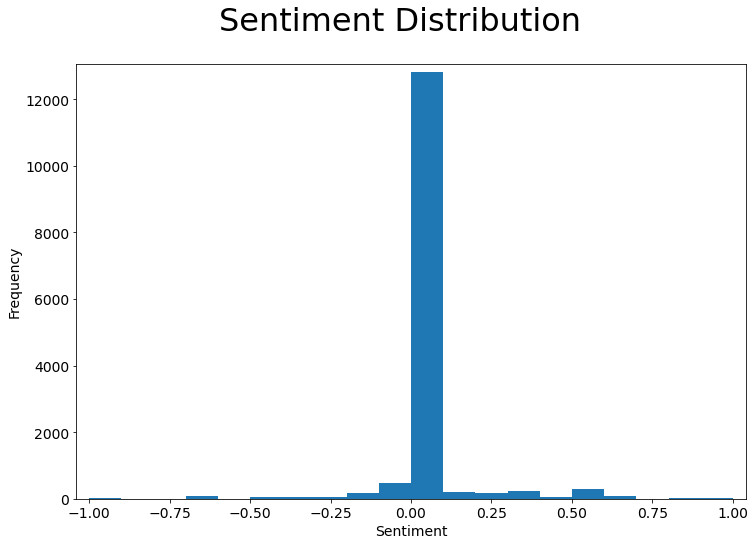

In [15]:
plt.figure(figsize=(12,8))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.yticks(fontsize=14)
plt.hist(df['polarity'], bins=20)
plt.suptitle('Sentiment Distribution', fontsize=32)
plt.show()

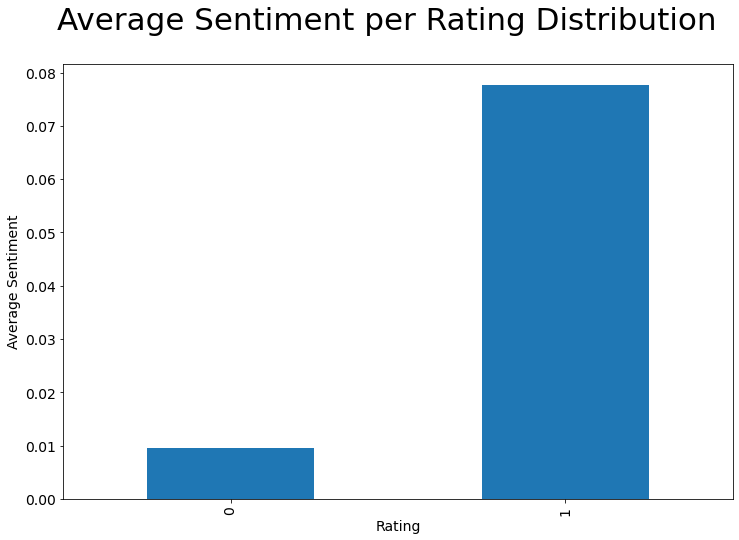

In [16]:
polarity_avg = df.groupby('category')['polarity'].mean().plot(kind='bar', figsize=(12,8))
plt.xlabel('Rating', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.yticks(fontsize=14)
plt.suptitle('Average Sentiment per Rating Distribution', fontsize=31)
plt.show()

In [17]:
# Count number of letters in a single sentence
df['letter_count'] = df['preprocessed_text'].astype(str).apply(len)

In [18]:
df.head()

,review_id,review_text,category,category_new,preprocessed_text,polarity,letter_count
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pelayannya ramah dan banyak membantu. Lokasi cukup dekat ke beberapa obyek wisata. kalau saya ke bandung lagi mungkin saya akan menginap lagi di sini.",1,Positif,penginapannya rapi bersih suasana tenang pelayannya ramah dan banyak membantu lokasi cukup dekat ke beberapa obyek wisata kalau saya ke bandung lagi mungkin saya akan menginap lagi di sini,0.00,189
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater untuk kopi/teh atau dispenser dan tidak tersedia kursi di depan kamar untuk merokok hingga harus duduk di lantai",0,Negatif,wifi tidak sampai kamar tidak tersedia heater untuk kopi teh atau dispenser dan tidak tersedia kursi di depan kamar untuk merokok hingga harus duduk di lantai,0.00,158
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh jdi sarang nyamuk dikamar mandinya...pesan superior double yg dikasih twin...mungkin karena murah saya maklumin, tpi kedepan mohon untuk bisa jdi perbaikan untuk bisa lbh baik lg..",0,Negatif,lantai kamar mandi kotor bau dan seperti sdh jdi sarang nyamuk dikamar mandinya pesan superior double yg dikasih twin mungkin karena murah saya maklumin tpi kedepan mohon untuk bisa jdi perbaikan untuk bisa lbh baik lg,0.35,219
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk tidak diganti,",0,Negatif,wc jorok kasur tidak dibersihkan handuk tidak diganti,0.00,54
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0,Negatif,bocor lagi,0.00,10


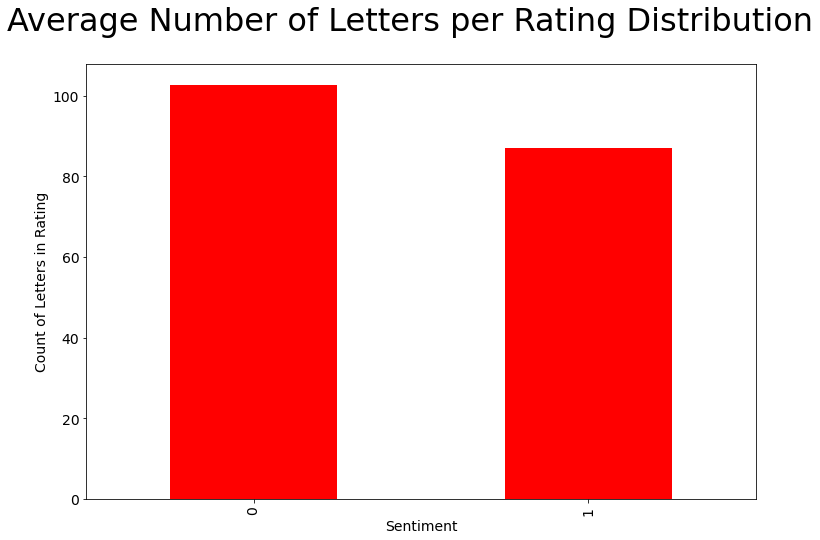

In [19]:
# Plot average number of letters per rating distribution

letter_avg = df.groupby('category')['letter_count'].mean().plot(kind='bar', color='red', figsize=(12,8))
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count of Letters in Rating', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.suptitle('Average Number of Letters per Rating Distribution', fontsize=32)
plt.show()

In [21]:
letter_avrg = df.groupby('category')['letter_count'].mean()
letter_avrg = pd.DataFrame(letter_avrg).reset_index()
letter_avrg

,category,letter_count
0,0,102.718358
1,1,87.002975


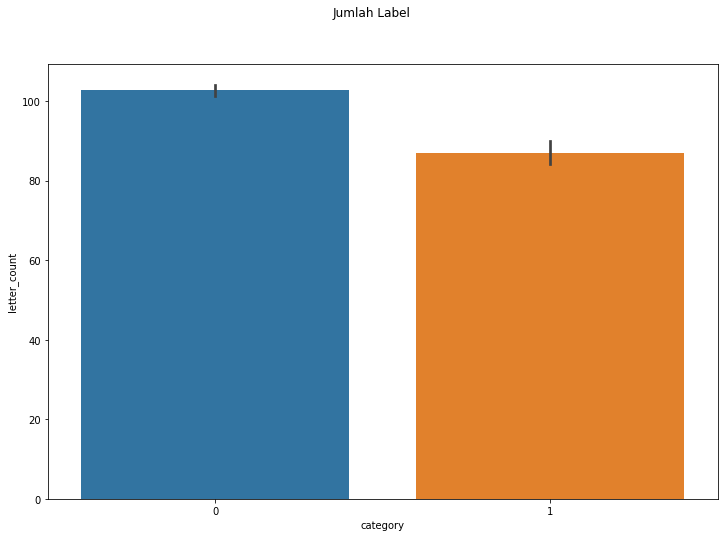

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(x='category', y='letter_count', data=df)
plt.suptitle("Jumlah Label")
plt.show()

In [23]:
# Count the difference in the average number of letters per rating

letter = df.groupby('category')['letter_count'].mean()
letter = pd.DataFrame(letter).reset_index()

letter_0 = letter[letter['category']==0]
letter_1 = letter[letter['category']==1]
    
class_0 = letter_0['letter_count'] 
class_1 = letter_1['letter_count']

selisih = float(class_0) - float(class_1)
print(f"Difference in the Average Number of Letters per Rating %.2f " % selisih)

Difference in the Average Number of Letters per Rating 15.72 


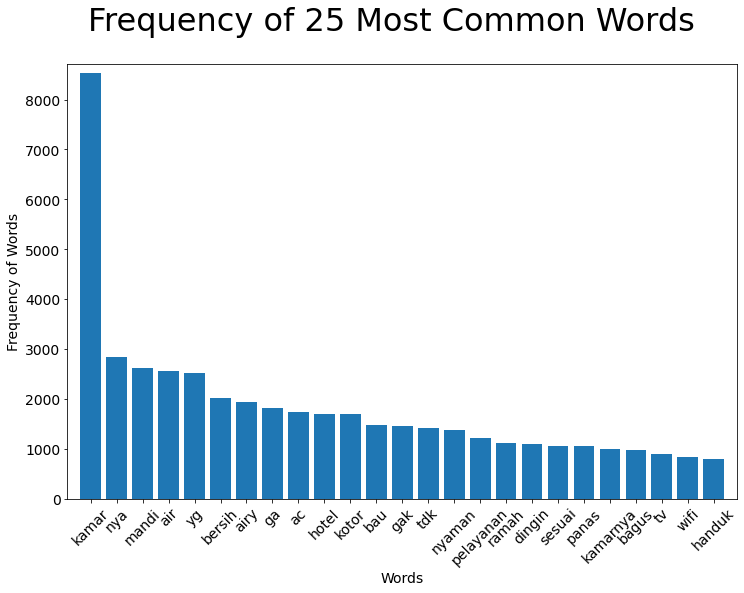

In [24]:
# Plot Top 25 Most Common Words

mostcommon_small = FreqDist(allwords_stopword).most_common(25)
x, y = zip(*mostcommon_small)

plt.figure(figsize=(12,8))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency of Words', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.suptitle('Frequency of 25 Most Common Words', fontsize=32)
plt.show()

# Modelling

In [25]:
# Apply Count Vectorizer (count how many times do a word appear in a sentence)

text = df["preprocessed_text"].values

count_vect = CountVectorizer()
bow = count_vect.fit_transform(text)
bow

<14856x13640 sparse matrix of type '<class 'numpy.int64'>'
	with 217596 stored elements in Compressed Sparse Row format>

In [26]:
# Count the number of words

len(count_vect.vocabulary_)

13640

In [27]:
# Join the vocabularies and the vectors into a dataframe

vocab = count_vect.vocabulary_
vect_vocab = pd.DataFrame(list(vocab.items()),columns = ['Vocabulary','Vector'])
vect_vocab.head()

,Vocabulary,Vector
0,penginapannya,9498
1,rapi,10220
2,bersih,1657
3,suasana,12016
4,tenang,12430


In [28]:
# Create a model based on Logistic Regression

X = df["preprocessed_text"]
y = df["category"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [30]:
# Check the value whether it is already balanced or not

pd.Series(y_train).value_counts()

0    10269
1     1615
Name: category, dtype: int64

In [31]:
# Build the model

logreg = LogisticRegression(solver='liblinear')

In [32]:
# Pipeline Logistic
logreg_pipe = Pipeline([("feature_extractions", count_vect),("classifier", logreg)])

In [33]:
# Train the model

logreg_pipe.fit(X_train, y_train)
logreg_pipe.score(X_test, y_test)

0.9427994616419919

In [34]:
# Evaluate the model

logreg_report = classification_report(y_true=y_test, y_pred=logreg_pipe.predict(X_test))
print(logreg_report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2570
           1       0.85      0.70      0.77       402

    accuracy                           0.94      2972
   macro avg       0.90      0.84      0.87      2972
weighted avg       0.94      0.94      0.94      2972



In [35]:
# Check the accuracy of the model

print("Model accuracy: %.2f%%" % (logreg_pipe.score(X_test, y_test) * 100))

Model accuracy: 94.28%


In [36]:
# Create a function to apply the model
sentiment_map = {0: "Mohon maaf atas ketidaknyamanannya ya :(", 
                  1: "Terima kasih atas masukan positifnya >o<"}

def predict_sentiment(review):
  review_cleaned = preprocess_text(review)

  prediction = int( logreg_pipe.predict([review_cleaned]) )
  sentiment = sentiment_map.get(prediction)

  return sentiment

predict_sentiment("tempat nyaman, WC bersih, wangi, wifi kencang, dan pegawai ramah")

'Terima kasih atas masukan positifnya >o<'

In [37]:
with open('nlp-model.bin', 'wb') as f_out:
  pickle.dump(logreg_pipe, f_out)

# WordCloud

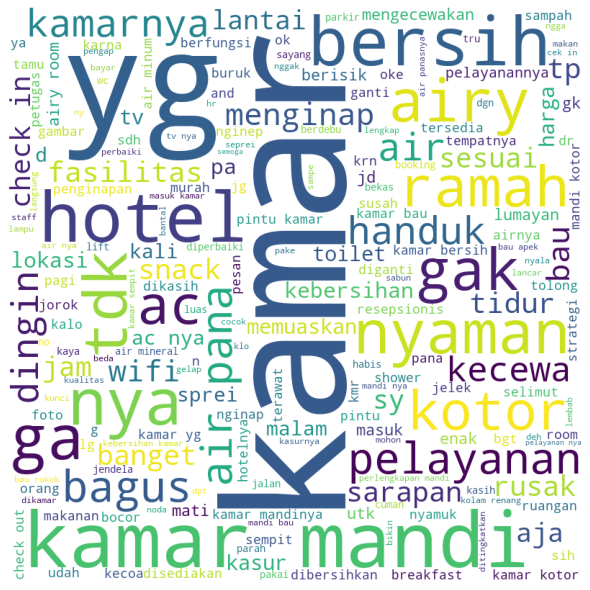

In [38]:
# Create the WordCloud

comment_words = ''
 
# Iterate through the dataframe
for val in df['preprocessed_text'].values:
  # Typecaste each val to string
  val = str(val)

  # Split the value
  tokens = val.split()

  # Add the words to the list
  comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = id_stop,
                min_font_size = 10).generate(comment_words)
 
# Plot the WordCloud             
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()